In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime 

In [2]:
df=pd.read_excel("D:/Journal paper work/Serbia_data_new/autumn.xlsx")

In [3]:
df.head()

,DT,Year,Month,Day,Hour,Precipitation,Temperature,GHI,TOA Irradiance,Snowfall,Snow mass,Cloud cover,Air density,date,DayOfYear,SolarDeclination,HourAngle,SolarZenithAngle
0,2010-09-01 00:00:00,2010,9,1,0,0.1565,10.046,0.0000,0.0000,0.0,0.0,0.4891,1.1747,2010-9-1,244,0.13482,-3.141593,127.488771
1,2010-09-01 01:00:00,2010,9,1,1,0.1712,10.097,0.0000,0.0000,0.0,0.0,0.5050,1.1748,2010-9-1,244,0.13482,-2.879793,125.777684
2,2010-09-01 02:00:00,2010,9,1,2,0.1699,10.076,0.0000,0.0000,0.0,0.0,0.5250,1.1753,2010-9-1,244,0.13482,-2.617994,120.956174
3,2010-09-01 03:00:00,2010,9,1,3,0.1756,9.992,0.0045,0.0452,0.0,0.0,0.5152,1.1762,2010-9-1,244,0.13482,-2.356194,113.741794
4,2010-09-01 04:00:00,2010,9,1,4,0.1656,10.113,28.2261,111.0822,0.0,0.0,0.4940,1.1771,2010-9-1,244,0.13482,-2.094395,104.889662


In [4]:
lower_limit = 4
upper_limit = 16
df = df[(df['Hour'] >= lower_limit) & (df['Hour'] <= upper_limit)]

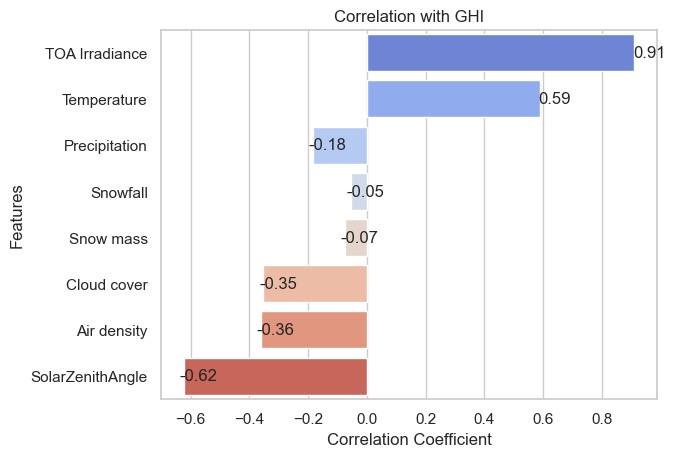

In [5]:
from sklearn import preprocessing

selected_feature = 'GHI'
selected_features = ['TOA Irradiance','Temperature','Precipitation','Snowfall','Snow mass','Cloud cover','Air density','SolarZenithAngle']
selected_data = df[selected_features + [selected_feature]].values

scaler = preprocessing.StandardScaler().fit(selected_data)
selected_data = scaler.transform(selected_data)
corr_coef = np.corrcoef(selected_data.T)
corr_with_selected_feature = corr_coef[-1, :-1]


corr_data = pd.DataFrame({'Selected Feature': selected_features, 'Correlation Coefficient': corr_with_selected_feature})
sns.set(style='whitegrid')
ax = sns.barplot(x='Correlation Coefficient', y='Selected Feature', data=corr_data, palette='coolwarm')


ax.set_xlabel('Correlation Coefficient')
ax.set_ylabel('Features')
ax.set_title(f'Correlation with {selected_feature}')

for i, corr in enumerate(corr_with_selected_feature):
    ax.text(corr + 0.05, i, f'{corr:.2f}', ha='center', va='center')

plt.show()

In [6]:
max_value1 = df['GHI'].max()
min_value1 = df['GHI'].min()

max_value2 = df['Temperature'].max()
min_value2 = df['Temperature'].min()

max_value3 = df['Cloud cover'].max()
min_value3 = df['Cloud cover'].min()

max_value4 = df['TOA Irradiance'].max()
min_value4 = df['TOA Irradiance'].min()

max_value5 = df['Air density'].max()
min_value5 = df['Air density'].min()

max_value6 = df['SolarZenithAngle'].max()
min_value6 = df['SolarZenithAngle'].min()

print("GHI(max):", max_value1)
print("GHI(min):", min_value1)

print("Temp(max):", max_value2)
print("Temp(min):", min_value2)

print("Cloud cover(max):", max_value3)
print("Cloud cover(min):", min_value3)

print("TOA Irradiance(max):", max_value4)
print("TOA Irradiance(min):", min_value4)

print("Air density(max):", max_value5)
print("Air density(min):", min_value5)

print("SolarZenithAngle(max):", max_value6)
print("SolarZenithAngle(min):", min_value6)

GHI(max): 846.8991
GHI(min): 0.0
Temp(max): 36.266
Temp(min): -2.899
Cloud cover(max): 0.9959
Cloud cover(min): 0.0
TOA Irradiance(max): 1082.5791
TOA Irradiance(min): 0.0
Air density(max): 1.2482
Air density(min): 1.0918
SolarZenithAngle(max): 121.9263443880258
SolarZenithAngle(min): 37.06197109183476


In [8]:
from sklearn.preprocessing import MinMaxScaler
columns_to_normalize = ['GHI','TOA Irradiance','Temperature','Precipitation','Snowfall','Snow mass','Cloud cover','Air density','SolarZenithAngle']
scaler = MinMaxScaler()

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])
df.head()

,DT,Year,Month,Day,Hour,Precipitation,Temperature,GHI,TOA Irradiance,Snowfall,Snow mass,Cloud cover,Air density,date,DayOfYear,SolarDeclination,HourAngle,SolarZenithAngle
4,2010-09-01 04:00:00,2010,9,1,4,0.095989,0.332235,0.033329,0.102609,0.0,0.0,0.496034,0.545396,2010-9-1,244,0.13482,-2.094395,0.799248
5,2010-09-01 05:00:00,2010,9,1,5,0.106480,0.351462,0.146407,0.328247,0.0,0.0,0.490310,0.541560,2010-9-1,244,0.13482,-1.832596,0.682836
6,2010-09-01 06:00:00,2010,9,1,6,0.128275,0.378093,0.294721,0.540974,0.0,0.0,0.442012,0.528133,2010-9-1,244,0.13482,-1.570796,0.559771
7,2010-09-01 07:00:00,2010,9,1,7,0.189195,0.408451,0.442482,0.725533,0.0,0.0,0.453158,0.511509,2010-9-1,244,0.13482,-1.308997,0.434502
8,2010-09-01 08:00:00,2010,9,1,8,0.196151,0.438759,0.570484,0.869312,0.0,0.0,0.413797,0.493606,2010-9-1,244,0.13482,-1.047198,0.311428


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
X=df[['Hour','TOA Irradiance','Temperature','Precipitation','Snowfall','Snow mass','Cloud cover','Air density','SolarZenithAngle']]
y=df[['GHI']]

In [11]:
split_index = int(len(X) * 0.9)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_test)

rmse_rf = mean_squared_error(y_test, y_pred, squared=False)
mae_rf = mean_absolute_error(y_test, y_pred)
r2_rf = r2_score(y_test, y_pred)

max_value = 847
min_value = 0
original_rmse = rmse_rf * (max_value - min_value) + min_value
original_mae = mae_rf * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_rf)

C:\Users\suraj\AppData\Local\Temp\ipykernel_7392\2018357567.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RMSE: 26.897574958177106
MAE: 16.5031727558077
R-squared: 0.9863706331361953


In [12]:
y_test = np.squeeze(y_test)
max_val = 847
min_val = 0
y_test_actual = y_test * (max_val - min_val) + min_val
y_pred_actual = y_pred * (max_val - min_val) + min_val
y_test_actual = np.round(y_test_actual, 3)
y_pred_actual = np.round(y_pred_actual, 3)


cross_checking = pd.DataFrame({'Actual': y_test_actual, 'Predicted': y_pred_actual})
print(cross_checking.head(20))

        Actual  Predicted
11861   82.470     99.766
11862  170.287    214.344
11863  261.396    322.433
11864  334.530    460.901
11865  379.450    438.537
11866  381.223    417.470
11867  340.696    377.599
11868  258.764    333.750
11869  173.490    259.706
11870  110.484    204.352
11871   60.131     96.003
11872   18.924     25.179
11884   27.070     29.032
11885  151.930    157.329
11886  304.314    309.987
11887  441.890    436.598
11888  533.086    544.625
11889  600.101    670.030
11890  625.515    676.359
11891  610.619    654.157


In [13]:
from sklearn.svm import SVR
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

rmse_svr = mean_squared_error(y_test, y_pred, squared=False)
mae_svr = mean_absolute_error(y_test, y_pred)
r2_svr = r2_score(y_test, y_pred)


max_value = 847
min_value = 0
original_rmse = rmse_svr * (max_value - min_value) + min_value
original_mae = mae_svr * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_svr)

C:\Users\suraj\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 55.842601762632974
MAE: 45.847406953814556
R-squared: 0.9412536731444661


In [14]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)


max_value = 847
min_value = 0
original_rmse = rmse_knn * (max_value - min_value) + min_value
original_mae = mae_knn * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_knn)

RMSE: 40.814951650412475
MAE: 27.911899201729348
R-squared: 0.9686174664749393


In [15]:
from sklearn.neural_network import MLPRegressor

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

mlp = MLPRegressor(hidden_layer_sizes=(40, 40, 40, 40, 40), activation='relu', solver='adam', max_iter=100, random_state=42)
mlp.fit(X_train_scaled, y_train)
y_pred = mlp.predict(X_test_scaled)

rmse_ann = mean_squared_error(y_test, y_pred, squared=False)
mae_ann = mean_absolute_error(y_test, y_pred)
r2_ann = r2_score(y_test, y_pred)

max_value = 847
min_value = 0
original_rmse = rmse_ann * (max_value - min_value) + min_value
original_mae = mae_ann * (max_value - min_value) + min_value

print('RMSE:', original_rmse)
print('MAE:', original_mae)
print('R-squared:', r2_ann)

C:\Users\suraj\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1617: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE: 34.59951889290291
MAE: 22.1762366650564
R-squared: 0.9774477670626376
